# Health Insurance Prediction Dataset
Exploring whether someone will apply for a recommended policy when they are on an insurance website.

Datset and competition are from [Kaggle](https://www.kaggle.com/datasets/owaiskhan9654/health-insurance-lead-prediction-raw-data).

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Importing data
df = pd.read_csv("Health Insurance Lead Prediction Raw Data.csv")

# Preprocessing and Data Visualization

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

Following variable have null values:
* Health Indicator
* Holding_Policy_Duration
* Holding_Policy_Type

In [3]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
for col in df.columns:
    print(df[col].value_counts())

1        1
33914    1
33916    1
33917    1
33918    1
        ..
16964    1
16965    1
16966    1
16967    1
50882    1
Name: ID, Length: 50882, dtype: int64
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
1       96
5       75
4       73
6       73
2       73
        ..
6041     1
5316     1
5606     1
5282     1
5450     1
Name: Region_Code, Length: 5316, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
75    2982
23    1671
24    1652
25    1644
22    1563
26    1

In [6]:
df.index.is_unique # No duplicate entries

True

Columns to drop:
* ID
* Region_Code

In [7]:
df = df.drop(["ID", "Region_Code"],axis = 1)
df.columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age',
       'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

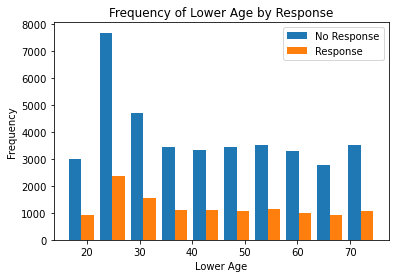

In [8]:
plt.hist([df.Lower_Age.loc[df["Response"] == 0], df.Lower_Age.loc[df["Response"] == 1]], label = ["No Response", "Response"])
plt.title("Frequency of Lower Age by Response")
plt.xlabel("Lower Age")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.show()

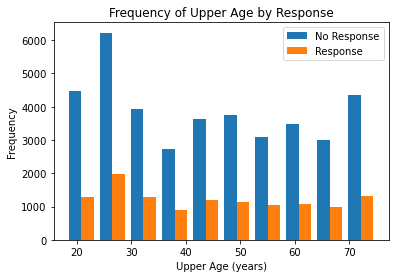

In [9]:
plt.hist([df.Upper_Age.loc[df["Response"] == 0], df.Upper_Age.loc[df["Response"] == 1]], label = ["No Response", "Response"])
plt.title("Frequency of Upper Age by Response")
plt.xlabel("Upper Age (years)")
plt.ylabel("Frequency")
plt.legend(loc = "upper right")
plt.show()

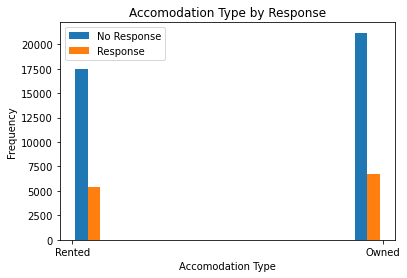

In [10]:
plt.hist([df.Accomodation_Type.loc[df["Response"] == 0], df.Accomodation_Type.loc[df["Response"] == 1]], label = ["No Response", "Response"])
plt.title("Accomodation Type by Response")
plt.xlabel("Accomodation Type")
plt.ylabel("Frequency")
plt.legend(loc = "upper left")
plt.show()

In [11]:
# fixing holding policy duration
def cleanInsurancePolicyDuration(row):
    policy = row["Holding_Policy_Duration"]
    try:
        policy = int(policy)
    except:
        pass
    
    try:
        if not isinstance(policy, int):
            policy = float(policy)
    except:
        pass
    
    if isinstance(policy,int) or isinstance(policy, float) and not isinstance(policy, bool):
        return policy if policy >= 0 else np.nan
    if isinstance(policy, bool):
        return np.nan
    
    if policy == "14+":
        return min(14 + np.random.chisquare(2), row["Upper_Age"])
    return np.nan

df.Holding_Policy_Duration = df.apply(cleanInsurancePolicyDuration, axis=1)
df.dtypes

City_Code                   object
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

Revist this - distribution of 14+ variable seems off

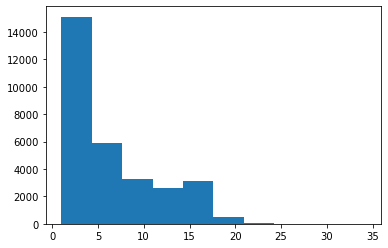

In [12]:
plt.hist(df.Holding_Policy_Duration)
plt.show()

In [13]:
df.Holding_Policy_Duration.isna().sum()

20251

In [14]:
df.loc[df.Holding_Policy_Duration > df.Upper_Age].sum()

City_Code                  0.0
Accomodation_Type          0.0
Reco_Insurance_Type        0.0
Upper_Age                  0.0
Lower_Age                  0.0
Is_Spouse                  0.0
Health Indicator           0.0
Holding_Policy_Duration    0.0
Holding_Policy_Type        0.0
Reco_Policy_Cat            0.0
Reco_Policy_Premium        0.0
Response                   0.0
dtype: float64

In [15]:
df = df.dropna(axis = 0)
df.shape

(23548, 12)

# Mapping variables

In [16]:
df["City_Code_Short"] = df["City_Code"].str[1:]

df["Health_Indicator"] = df["Health Indicator"].str[1:]

# def cleanCityCode(row):
#     city_code = row["City_Code_Short"]
    
#     try: city_code = int(city_code)
#     except: pass
    
#     if isinstance(city_code, int) or isinstance(city_code, float):
#         return city_code
#     return np.nan

# df["City_Code_Short"] = df.apply(cleanCityCode, axis=1)

df.City_Code_Short = df.City_Code_Short.astype(int)
df.Health_Indicator = df.Health_Indicator.astype(float)

df.City_Code_Short.value_counts()

1     4397
2     3800
3     2249
4     1577
9      932
7      902
8      843
6      831
10     764
5      615
15     576
17     533
11     515
16     456
20     435
13     431
19     407
12     396
21     351
18     351
14     335
24     290
23     244
22     227
26     225
29     168
25     165
28     131
27     116
33     103
32      59
34      51
30      27
35      24
36      15
31       7
Name: City_Code_Short, dtype: int64

In [17]:
accomodation_map = {"Owned": 0, "Rented": 1}
df.Accomodation_Type = df.Accomodation_Type.map(accomodation_map)

reco_map = {"Individual":0, "Joint": 1}
df.Reco_Insurance_Type = df.Reco_Insurance_Type.map(reco_map)

spouse_map = {"No": 0, "Yes": 1}
df.Is_Spouse = df.Is_Spouse.map(spouse_map)

In [18]:
df.dtypes

City_Code                   object
Accomodation_Type            int64
Reco_Insurance_Type          int64
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int64
Health Indicator            object
Holding_Policy_Duration    float64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
City_Code_Short              int64
Health_Indicator           float64
dtype: object

In [19]:
df = df.drop(["City_Code", "Health Indicator"], axis=1)
df.shape

(23548, 12)

In [20]:
df.head(10)

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code_Short,Health_Indicator
0,1,0,36,36,0,14.272059,3.0,22,11628.0,0,3,1.0
3,0,1,52,48,0,14.256802,3.0,19,17780.0,0,24,1.0
4,1,0,44,44,0,3.000000,1.0,16,10404.0,0,8,2.0
5,1,0,52,52,0,5.000000,1.0,22,15264.0,1,9,2.0
7,0,1,75,73,1,9.000000,4.0,17,29344.0,1,1,4.0
8,0,1,52,43,0,14.000000,3.0,1,27283.2,0,15,1.0
11,0,1,59,47,1,3.000000,3.0,13,25043.2,0,27,3.0
14,1,0,27,27,0,2.000000,3.0,9,9440.0,0,20,3.0
16,0,0,34,34,0,11.000000,1.0,20,6660.0,0,3,1.0
18,0,0,55,55,0,1.000000,3.0,21,12580.0,0,1,2.0


# Machine Learning

In [21]:
# Importing packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = df.drop(["Response"], axis =1)
y = df.Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 59)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17661, 11)
(5887, 11)
(17661,)
(5887,)


Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7533548496687617

Support Vector Machines

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.7533548496687617

Naive Bayes

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.7533548496687617

K Nearest Neighbors

Begin with graph to find best k - code from [here](https://gist.github.com/64lines/c0cd488725ae3c4ec157b90339acdb18)

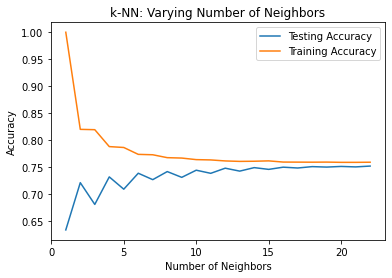

In [26]:
neighbors = np.arange(1, 23)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.751486325802616

Decision Tree Classifier

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6663835569899779

Random Forest

In [29]:
rf = RandomForestClassifier(max_depth=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.744691693562086

k-NN has the best accuracy.